# NLP Processing With SpaCy
---

## Contents
---
- [Data Retrieval](#Data-Retrieval)
- [SpaCy Processing](#SpaCy-Processing)

### Data Retrieval
___

**Library Imports**

In [1]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

**Read in cleaned_df.csv**

In [2]:
cleaned_df = pd.read_csv('../data/clean_aviation_data.csv')

In [3]:
cleaned_df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


After looking through data, decided that 'unknown' is not a good choice to fill probable_cause NaNs with.  Will change to ReportUnavailable so that I can ensure it's a unique text value.  Something must be included in each row so that there are no NaNs for modeling.  We don't want to drop any rows just because 'probable_cause' is blank.

It appears that 'probable_cause' is left blank either because the investigation isn't complete or the 'report_status' is NA.

In [4]:
cleaned_df['probable_cause'] = cleaned_df['probable_cause'].str.replace('unknown', 'ReportUnavailable')

In [5]:
cleaned_df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,ReportUnavailable,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,ReportUnavailable,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,ReportUnavailable,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,ReportUnavailable,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,ReportUnavailable,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


### SpaCy Processing
---

In [6]:
nlp = spacy.load('en_core_web_md')

In [7]:
# Load the medium size pipeline
nlp = spacy.load('en_core_web_md')

In [8]:
word_exception = 'ReportUnavailable'
nlp.vocab[word_exception].is_stop = False

**Function that allows SpaCy to process text data so that it can be ran through an apply method for the 'text' column of the 'cleaned_df' dataset.**

Function created using SpaCy lesson, references are https://spacy.io/api/token, https://realpython.com/natural-language-processing-spacy-python/#lemmatization, and ChatGPT for stucture help.  Hank reminded me that .apply will apply a function to a dataframe column.


In [9]:
def spacy_processor(text):
    
    #Put the data into spaCy model
    doc = nlp(text)
    
    # Create a tokens list with only alpha characters.
    # Also lemmatizes words and omits SpaCy stop words
    tokens = [token.lemma_.lower().strip() for token in doc if token.is_alpha and not token.is_stop]

    #Put the processed text back together
    processed_text = ' '.join(tokens)

    #return processed text to dataframe
    return processed_text
    

In [10]:
# Apply the function to the text column of the cleaned_corpus dataframe
cleaned_df['probable_cause'] = cleaned_df['probable_cause'].apply(spacy_processor)

In [11]:
#Checking out how it looks
cleaned_df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,reportunavailable,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,reportunavailable,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,reportunavailable,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,reportunavailable,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,reportunavailable,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [12]:
#Checking out a non 'reportunavailable' entry in the processed_text column
cleaned_df['probable_cause'][24]

'fatigue failure right main landing gear initiate liquid metal embrittlement cadmium arc burn location outer cylinder tooling hole area arc burn likely result operator error stylus cadmium plating operation overhaul'

In [13]:
cleaned_df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,reportunavailable,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,reportunavailable,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,reportunavailable,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,reportunavailable,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,reportunavailable,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [14]:
#cleaned_df.to_csv('../data/text_processed_aviation_data.csv', index = False)

### EDA With Words
___

In [15]:
# Filer for just the probable_cause' columns
processed_words = cleaned_df['probable_cause']

In [16]:
#Vectorize words for EDA
cvec = CountVectorizer(max_features = 2000)

#Fit and transform the status column
word_vectors = cvec.fit_transform(processed_words)

#create a dataframe of vectors and columns representing the words
word_vec_df = pd.DataFrame(word_vectors.todense(),
                     columns = cvec.get_feature_names_out())


word_vec_df.head()

,ability,able,abnormal,abnormally,abort,aborted,abrasion,abrupt,abruptly,absence,...,wire,wiring,work,workload,write,wrong,yellow,yoke,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Will drop 'reportunavailable' column since it's a placeholder for when there was no data
# in the probable_cause column

In [18]:
word_vec_df.drop(columns = ['reportunavailable'], inplace = True)

### Most Popular Words/Bigrams/
___

Text(0.5, 1.0, 'Most Popular Words in Airline Accident Data')

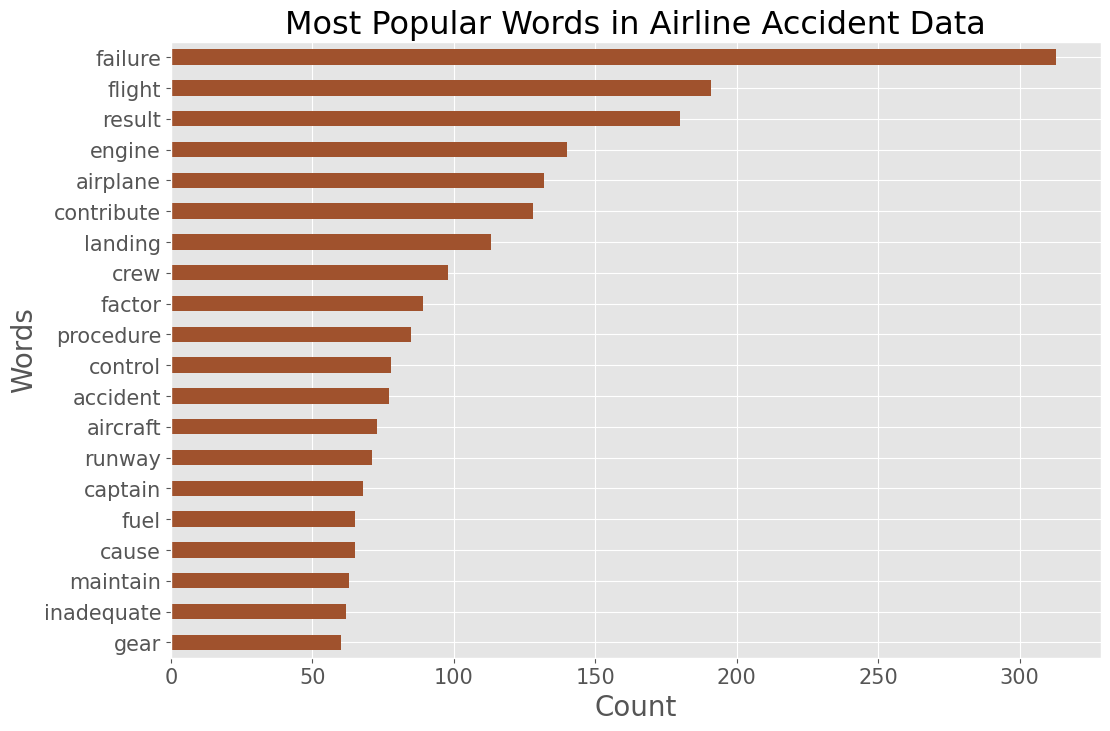

In [19]:
#Plot for most popular words in corpus

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
plt.tight_layout()

#Plot
word_vec_df.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color = 'sienna')

#Plot labels
plt.ylabel('Words', size = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Words in Airline Accident Data', size = 23)

#Save and export
#plt.savefig('../project-3/plot_images/most_popular_words.png', dpi = 192);


In [20]:
# Create, fit, and transform a vectorizer that only considers bigrams
bigram_cvec = CountVectorizer(max_features = 2000, ngram_range = (2,2))
bigram_vectors = bigram_cvec.fit_transform(processed_words)

#create a dataframe of bigram vectors and columns representing the words
bigram_vec_df = pd.DataFrame(bigram_vectors.todense(),
                     columns = bigram_cvec.get_feature_names_out())


bigram_vec_df.head()

,ability consider,abnormally high,absence faa,accident captain,accident controller,accident failure,accident flight,accident inadequate,accident lack,accident officer,...,visually scan,wake turbulence,walker tug,wear acme,weather condition,wet downhill,wet runway,wheel steering,wind gust,wing walker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


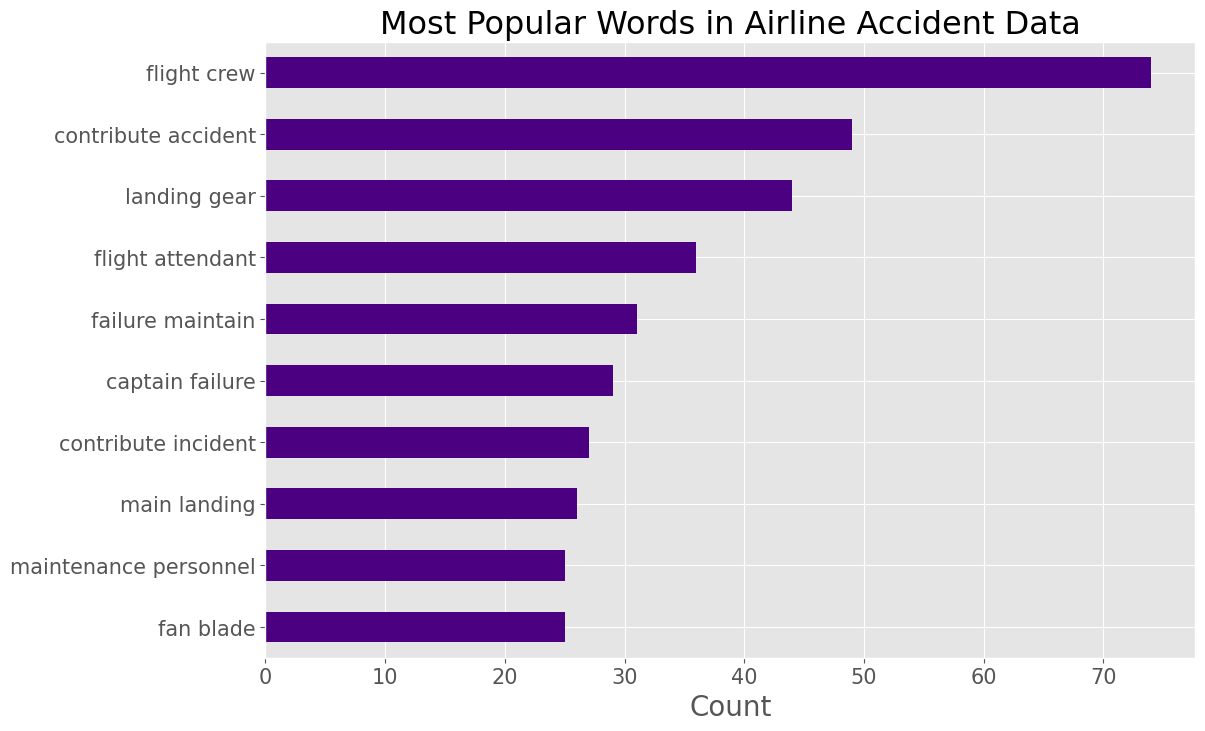

In [21]:
# Plot for most popular bigrams in set

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
plt.tight_layout()

#Plot
bigram_vec_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'indigo')

#Plot labels
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Words in Airline Accident Data', size = 23)

#Save and export
plt.savefig('../images/most_popular_bigrams.png', dpi = 192);


In [22]:
# Trigrams
trigram_cvec = CountVectorizer(max_features = 2000, ngram_range = (3,3))
trigram_vectors = trigram_cvec.fit_transform(processed_words)

#create a dataframe of trigram vectors and columns representing the words
trigram_vec_df = pd.DataFrame(trigram_vectors.todense(),
                     columns = trigram_cvec.get_feature_names_out())


trigram_vec_df.head()

,accident captain failure,accident flight crew,acme nut thread,adapter assembly manufacturer,adapter bolt insert,adequate visual lookout,adequately monitor approach,adherence standard operating,agent lack situational,aileron control cable,...,turbulence cruise flight,turbulence result injury,unauthorized repair vendor,undercowl engine fire,upper lock link,vendor maintenance personnel,visually scan runway,wake turbulence encounter,wear acme nut,wet downhill runway
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


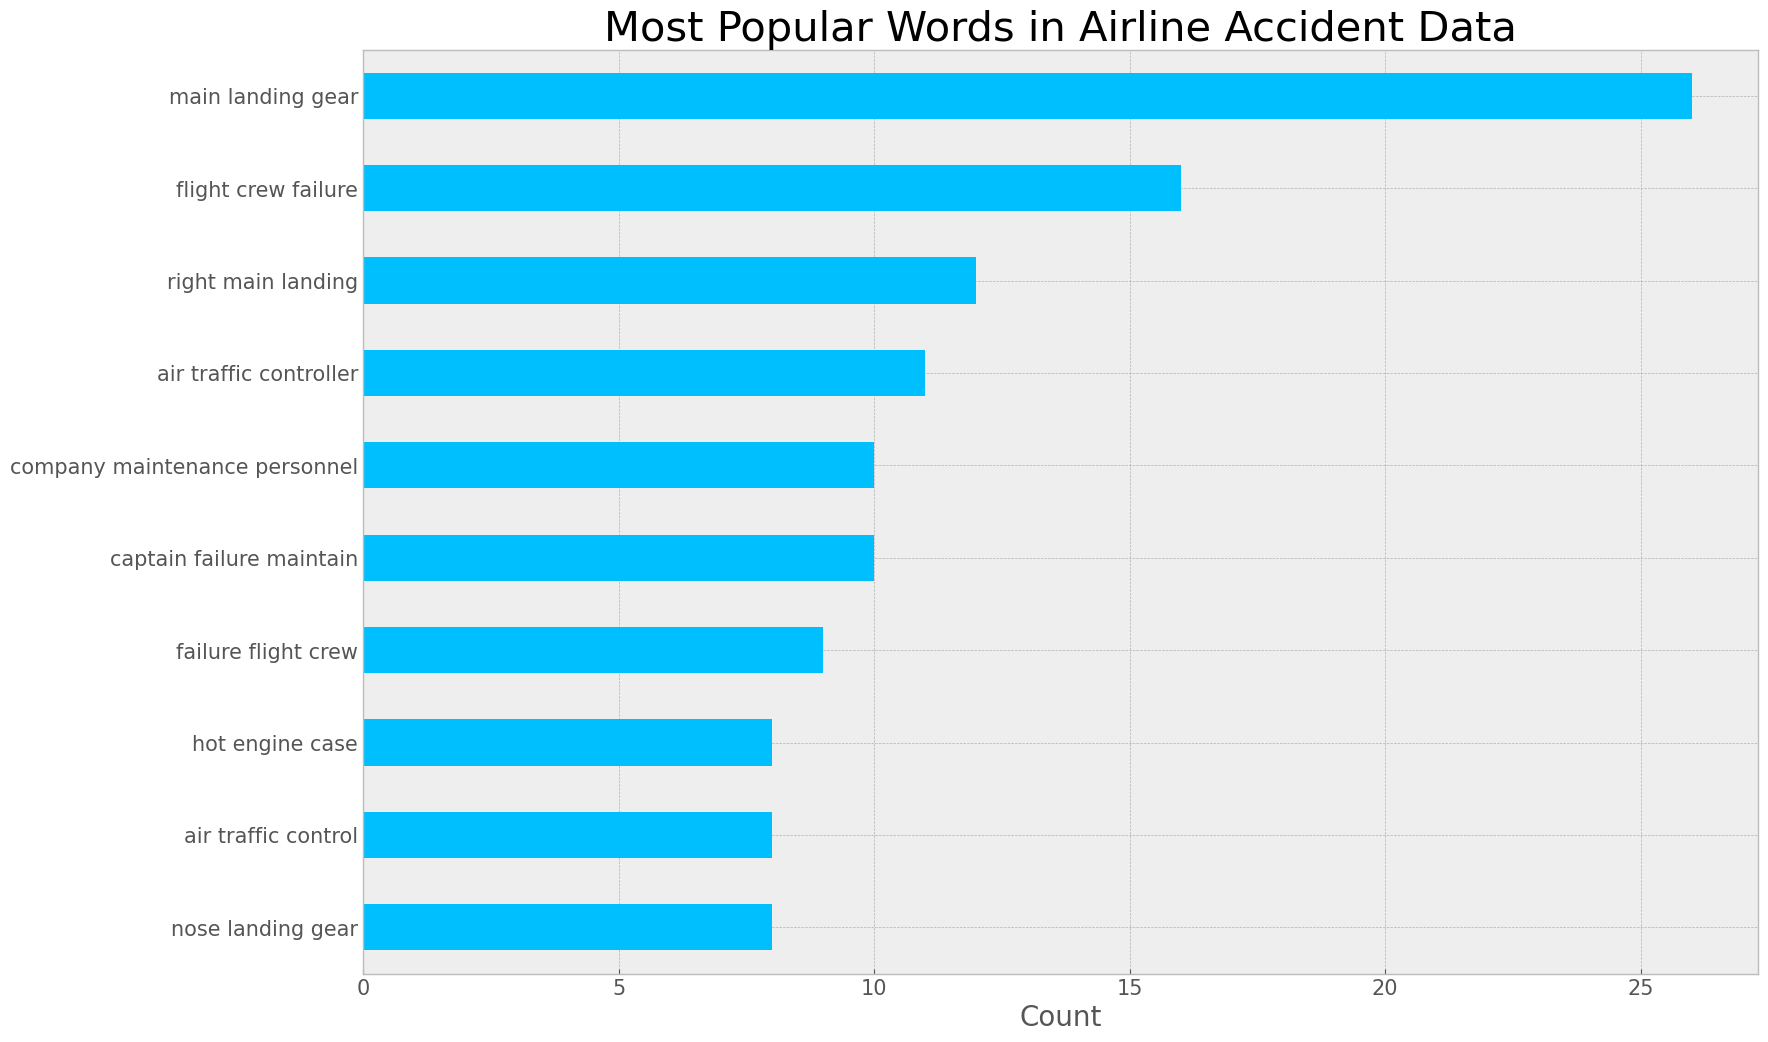

In [23]:
# Plot for most popular trigrams in set

# Plot Settings
plt.figure(figsize = (18,12))
plt.style.use('bmh')
plt.tight_layout()

#Plot
trigram_vec_df.sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'deepskyblue')

#Plot labels
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Words in Airline Accident Data', size = 30)


#Save and export
plt.savefig('../images/most_popular_trigrams.png', dpi = 192);